## PLOTTING FREQEUCNY FREQUENCY COVARIANCE
This code reads in the data and plots the normalised covariance matrices of the data (and the foregrounds). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

font = {"size": 16, "family": "STIXGeneral"}
axislabelfontsize = "x-large"
plt.rc("font", **font)
plt.rcParams["text.usetex"] = True

In [3]:
### LOAD IN THE DATA ###
T_HI = np.load('MultiDarkSims/dT_HI.npy')    #HI intensity map
T_FG = np.load('MultiDarkSims/dT_FG.npy')     #foreground map
nx,ny,nz = np.shape(T_HI)

In [4]:
### MEAN CENTRE AND COMBINE SIMULATED FOREGROUNDS AND SIGNAL 
dT_HI = T_HI - np.mean(T_HI)
dT_FG = T_FG - np.mean(T_FG)

Calulate the covariances of the foreground and the signal: 

In [7]:
axes = np.shape(dT_FG)
FG = np.reshape(dT_FG,(axes[0]*axes[1],axes[2]))     #reshape data so long 1d array of pixels for each z
FG = np.swapaxes(FG,0,1)                                #swap axes so that data in form Nz, Npix
FG_cov = np.cov(FG)
FG_cov = FG_cov/FG_cov.max() 

In [8]:
axes = np.shape(dT_HI)
HI = np.reshape(dT_HI,(axes[0]*axes[1],axes[2]))     #reshape data so long 1d array of pixels for each z
HI = np.swapaxes(HI,0,1)                                #swap axes so that data in form Nz, Npix
HI_cov = np.cov(HI)
HI_cov = HI_cov/HI_cov.max()    #normalise the covariance matrix

Plot these matrices: 

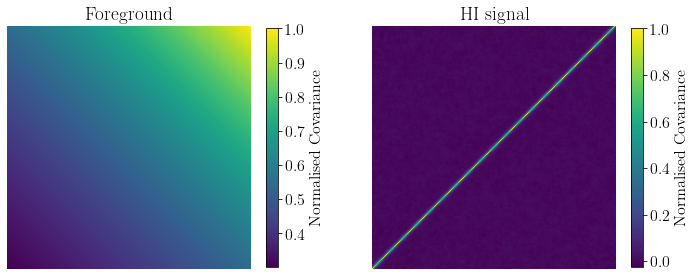

In [9]:
### PLOT TRUE AND ESTIMATED FOREGROUNDS ###
x_scale = np.linspace(703,877,225)
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(wspace=0.2)

#plot HI intensity map 
plt.subplot(121)
plt.imshow(FG_cov, origin = 'lower')
plt.title("Foreground")
plt.colorbar(label="Normalised Covariance", shrink = 0.73)
plt.axis('off')

#plot HI intenisty map with foreground
plt.subplot(122)
plt.imshow(HI_cov, origin = 'lower')
plt.title("HI signal")
plt.colorbar(label="Normalised Covariance", shrink = 0.73)
plt.axis('off')

plt.savefig("plots/covariance.png")

#### Plot the covariances of the smoothed data
Smoothing is applied using functions in smoothing.py (see gaussian beam convolution notebook) and now the covariance matrices of the smoothed data will be plotted.

In [14]:
from smoothing import smoothimage

In [15]:
# choose a box size, in degrees:
lx, ly, lz = 29, 29, 29    #unclear on the effect of the choice of bin size, 29degrees used in paper

#specify sigma of gaussian beam, ie size of smoothing, in degrees
sig = 1  

In [16]:
T_ALL = T_HI + T_FG

In [17]:
smoothed = []               #cube of smoothed images of shape: [nz,nx,ny]
HI_smoothed = []
for i in range(nz):
    image = T_ALL[:,:,i]
    HI_image = T_HI[:,:,i]
    
    smoothed_image = smoothimage(image,lx,ly,nx,ny,sig)
    smoothed.append(smoothed_image)
    
    HI_smoothed_image = smoothimage(HI_image,lx,ly,nx,ny,sig)
    HI_smoothed.append(HI_smoothed_image)    
      

In [18]:
smoothed = np.array(smoothed)
smoothed = smoothed - np.mean(smoothed)
smoothed = np.reshape(smoothed,(axes[0],axes[1]*axes[2])) 

In [19]:
HI_smoothed = np.array(HI_smoothed)
HI_smoothed = HI_smoothed - np.mean(HI_smoothed)
HI_smoothed = np.reshape(HI_smoothed,(axes[0],axes[1]*axes[2])) 

In [20]:
cov = np.cov(smoothed)
cov = cov/cov.max() 

HI_cov = np.cov(HI_smoothed)
HI_cov = HI_cov/HI_cov.max()

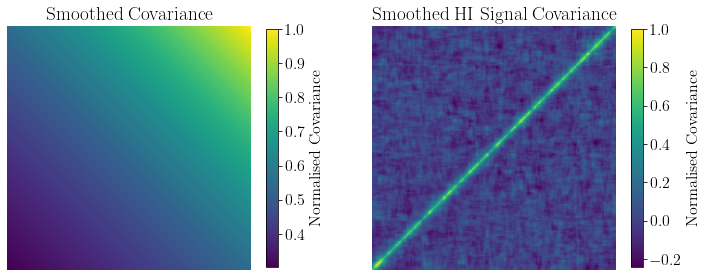

In [23]:
### PLOT COVARIANCE MATRICES OF SMOOTHED DATA ###

fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(wspace=0.2)

#plot HI intensity map 
plt.subplot(121)
plt.imshow(cov, origin = 'lower')
plt.title("Smoothed Covariance")
plt.colorbar(label="Normalised Covariance", shrink = 0.73)
plt.axis('off')

#plot HI intenisty map with foreground
plt.subplot(122)
plt.imshow(HI_cov, origin = 'lower')
plt.title("Smoothed HI Signal Covariance")
plt.colorbar(label="Normalised Covariance", shrink = 0.73)
plt.axis('off')

plt.show()

#plt.savefig("plots/smoothed-covariance.png")